Hand-specify some transition rules for the Adult dataset and use to build an edge-weighted DiGraph between a small subsample.

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("adult.csv", index_col=0)

In [5]:
sample = df.sample(5)
sample

,age,education,sex,weekly-hours,employment-type_Government,employment-type_Privately-Employed,employment-type_Self-Employed,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,compensation
idx,,,,,,,,,,,,,,,,,,,,,
45343,50,5,0,35,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
33267,62,2,0,20,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
44347,24,2,0,20,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
43491,37,2,1,40,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7321,49,4,1,40,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1


In [10]:
rules = {
    "age-increase-only":            lambda d: d[0] if d[0] >= 0 else np.inf, # Age can only increase; larger increases penalised proportionally.
    "education-increase-gradually": lambda d: d[1] if d[1] >= 0 else np.inf, # Education can only increase; larger increases penalised proportionally.
    "sex-fixed":                    lambda d: 0 if d[2] == 0 else np.inf, # Sex cannot change.
    "hours-similar":                lambda d: np.abs(d[3]), # Penalise absolute change in hours.
    "race-fixed":                   lambda d: 0 if (d[20:25] == 0).all() else np.inf, # Race cannot change.
}

In [11]:
X = sample.to_dict(orient="index")
G = nx.DiGraph()
for x, attr in X.items(): X[x]["np"] = np.array(list(attr.values()))
G.add_nodes_from((x, attr) for x, attr in X.items())
n = G.nodes(data=True)
for i, ai in n:
    for j, aj in n:
        if i != j: G.add_edge(i, j, **{n: r(aj["np"] - ai["np"]) for n, r in rules.items()})
            # break
    # break

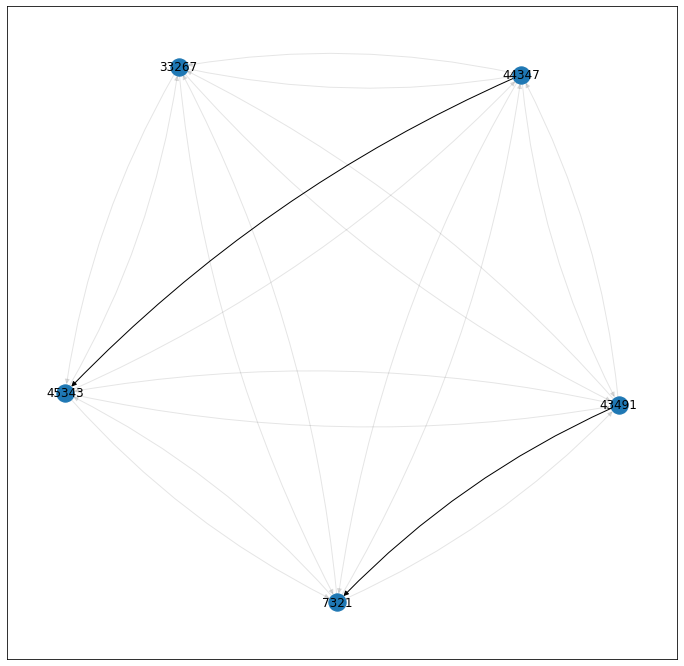

In [13]:
_, ax = plt.subplots(figsize=(12,12))
c = [[0,0,0,1],[0,0,0,0.1]]
nx.draw_networkx(G, edge_color=[c[bool(sum(G[u][v].values()) == np.inf)] for u,v in G.edges()], connectionstyle="arc3,rad=0.1")
# list(G.edges(data=True))